# Convnet trained on both whitenoise and natural scenes for all cells in 15-10-07 experiment

In [1]:
import numpy as np
from os.path import expanduser
import os
import json
import theano
import tableprint
import pyret.filtertools as ft
import pyret.visualizations as pyviz
from keras.models import model_from_json
import h5py
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
%matplotlib inline
#%matplotlib qt

from pylab import rcParams
rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

Using gpu device 0: GeForce GTX TITAN X (CNMeM is disabled)
/home/lane/ssd/code/theano/theano/tensor/signal/downsample.py:5: UserWarning: downsample module has been moved to the pool module.
  warnings.warn("downsample module has been moved to the pool module.")


In [11]:
# deep retina imports
import deepretina.visualizations as viz
from deepretina.preprocessing import datagen, loadexpt
from deepretina.modeltools import load_model, load_partial_model, list_layers, get_performance, get_weights, get_test_responses
from deepretina.metrics import *

## Load model

In [3]:
model_path = os.path.expanduser('~/data/deep-retina/saved/lenna.salamander/2016-01-26 10.35.16 convnet/')
weight_name = 'epoch029_iter04250_weights.h5'

In [4]:
mdl = load_model(model_path, weight_name)

In [5]:
list_layers(model_path, weight_name)

+-----------+------------+-----------+
+-----------+------------+-----------+
|layer      | weights    | biases    |
+-----------+------------+-----------+
+-----------+------------+-----------+
|   layer_0 |    param_0 |    param_1|
|   layer_1 |            |           |
|   layer_2 |            |           |
|   layer_3 |            |           |
|   layer_4 |    param_0 |    param_1|
|   layer_5 |            |           |
|   layer_6 |    param_0 |    param_1|
+-----------+------------+-----------+


In [6]:
true_white, predicted_white = get_test_responses(mdl, stim_type='white', cells=[0,1,2,3,4])
true_natural, predicted_natural = get_test_responses(mdl, stim_type='natural', cells=[0,1,2,3,4])

Loading testing data... Done.
Loading testing data... Done.


In [8]:
(true_white.shape, predicted_white.shape)

((5950, 5), (5950, 5))

## whitenoise

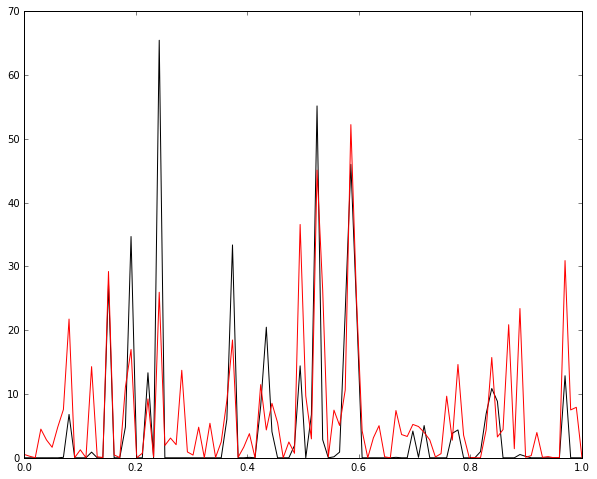

In [9]:
plt.plot(np.linspace(0, 100*.01, 100), true_white[:100, 0], 'k')
plt.plot(np.linspace(0, 100*.01, 100), predicted_white[:100, 0], 'r')

## naturalscene

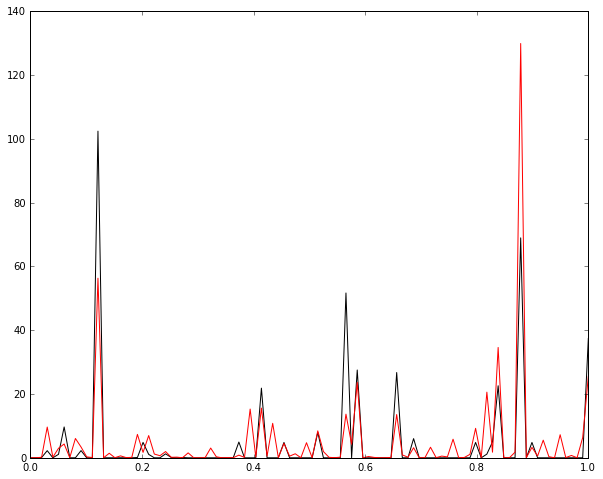

In [10]:
plt.plot(np.linspace(0, 100*.01, 100), true_natural[:100, 0], 'k')
plt.plot(np.linspace(0, 100*.01, 100), predicted_natural[:100, 0], 'r')

# Quantitative performance  

This model is in some cases a better predictor of the average PSTH than the cells' held-out repeat

In [12]:
cc_multi = multicell(cc)
lli_multi = multicell(lli)
rmse_multi = multicell(rmse)
fev_multi = multicell(fev)

### whitenoise

In [14]:
average_cc_white, all_ccs_white = cc_multi(true_white, predicted_white)
print(average_cc_white)
print(all_ccs_white)

0.681995736097
[0.7479431977760399, 0.63429757978041479, 0.63824751175471206, 0.76600922999485244, 0.62348116117826491]


### naturalscene

In [15]:
average_cc_natural, all_ccs_natural = cc_multi(true_natural, predicted_natural)
print(average_cc_natural)
print(all_ccs_natural)

0.569298479949
[0.63840606219644536, 0.48230207849836154, 0.47858010627333036, 0.61920902065292027, 0.62799513212546765]


# Visualize model

#### Conv layer

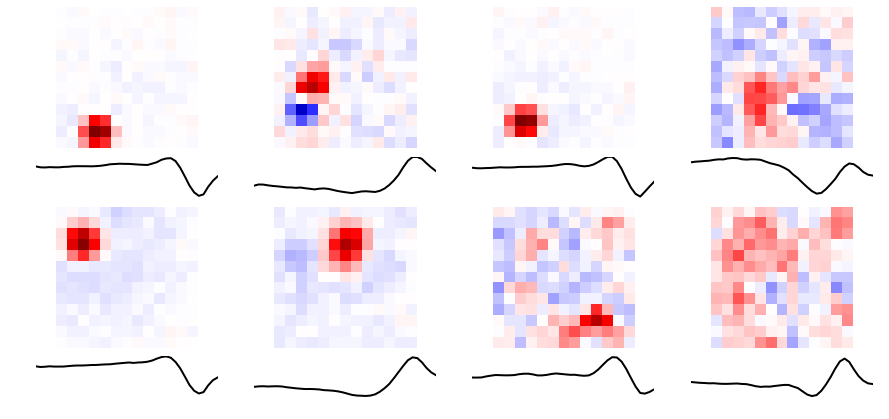

In [16]:
viz.visualize_convnet_weights(model_path + weight_name, normalize=True, fig_size=(15,7))

#### Affine layer

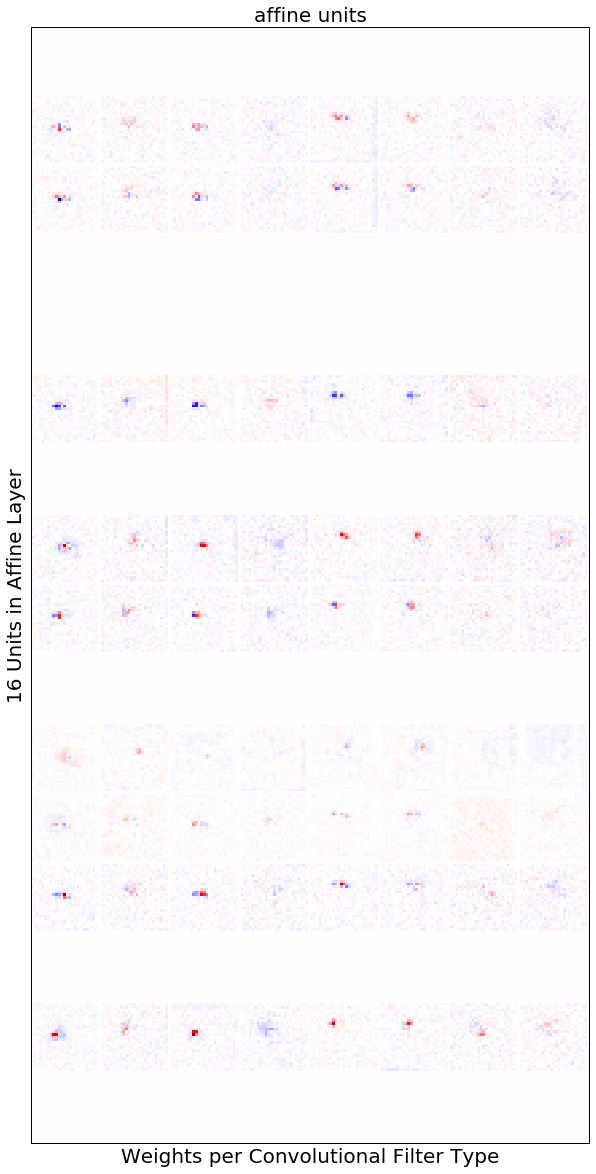

In [17]:
viz.visualize_affine_weights(model_path + weight_name, 8, fig_size=(20,20), layer_name='layer_4')

## What do the STAs of these affine inter-units?

In [ ]:
sta = viz.get_sta(mdl, 4)

In [ ]:
viz.visualize_sta(sta, normalize=True)

## STAs of the final cell outputs?

In [ ]:
final_stas = viz.get_sta(mdl, 6)

In [ ]:
viz.visualize_sta(final_stas, normalize=True)